Kolerasyon Analizi:Değişkenler arasındaki ilişki,bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

Kolerasyon anlamlılığı testi
H0 : p = 0     H1 : p != 0

Kolerasyon Analizi : Varsayımlar

-İki değişken içinde normallik varsayımı

-Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı

-Varsayım sağlanmıyorsa Spearman Kolerasyon Katsayısı

In [1]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


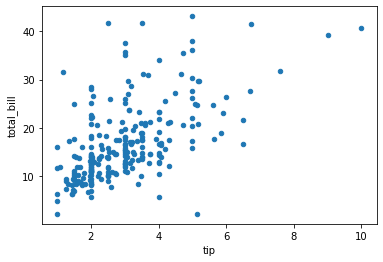

In [4]:
df.plot.scatter("tip","total_bill");

Kolerasyon Varsayım Kontrolü

In [5]:
from scipy.stats import shapiro

In [6]:
shapiro(df["tip"])

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [7]:
shapiro(df["total_bill"])

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

H0 reddedilir ama biz bu sağlanmış gibi devam edeceğiz sonra nonparametrik kolerasyon testi yapacağız.

-----
Kolerasyon Katsayısı Hiptez Testi

Kolerasyon Katsayısı

In [8]:
df["tip"].corr(df["total_bill"])

0.5766634471096378

In [9]:
df["tip"].corr(df["total_bill"],method = "spearman") #Varsayım sağlanmadığı için method spearman giriyoruz.

0.593691939408997

Kolerasyon Anlamlılığı Testi

In [16]:
from scipy.stats.stats import pearsonr 
test_istatistigi,pvalue = pearsonr(df["tip"],df["total_bill"])
print('Kolerasyon katsayısı = %.4f,pvalue = %.4f' % (test_istatistigi,pvalue))

Kolerasyon katsayısı = 0.5767,pvalue = 0.0000


Nonparametrik Hipotez Testi

In [17]:
import scipy.stats as stats

In [18]:
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [19]:
test_istatistigi,pvalue = stats.spearmanr(df["tip"],df["total_bill"])
print('Kolerasyon katsayısı = %.4f,pvalue = %.4f' % (test_istatistigi,pvalue))

Kolerasyon katsayısı = 0.5937,pvalue = 0.0000


H0 : değişkenlerin arasında istatistiki olarak anlamlı bir fark yoktur.H0 reddedilir.Değişkenlerin arasında isattistiki olarak anlamlı bir fark vardır.Bu ilişki pozitif yönlüdür.Orta derecededir.

In [20]:
test_istatistigi,pvalue = stats.kendalltau(df["tip"],df["total_bill"])
print('Kolerasyon katsayısı = %.4f,pvalue = %.4f' % (test_istatistigi,pvalue))

Kolerasyon katsayısı = 0.4401,pvalue = 0.0000


Bunuda kullanabiliriz.